# Replica grafici Eurostat

esempi presi da Banca Intesa. (2025). La variante iberica: Un confronto tra la performance  economica di Italia e Spagna. blob:https://imi.intesasanpaolo.com/629f973f-4c7f-4c7e-aba1-45a67bbd98da


## Grafico 1 - PIL reale (volume)

- PIL reale da fine 1999: la sovraperformance dell’economia spagnola non è una novità
- Nota: 1999 4° trim.= 100; Fonte: Intesa Sanpaolo, Eurostat
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_gdp?geo=IT&s_adj=SCA&unit=CLV_MEUR&na_item=B1GQ

![](./media/20250707112807.png)

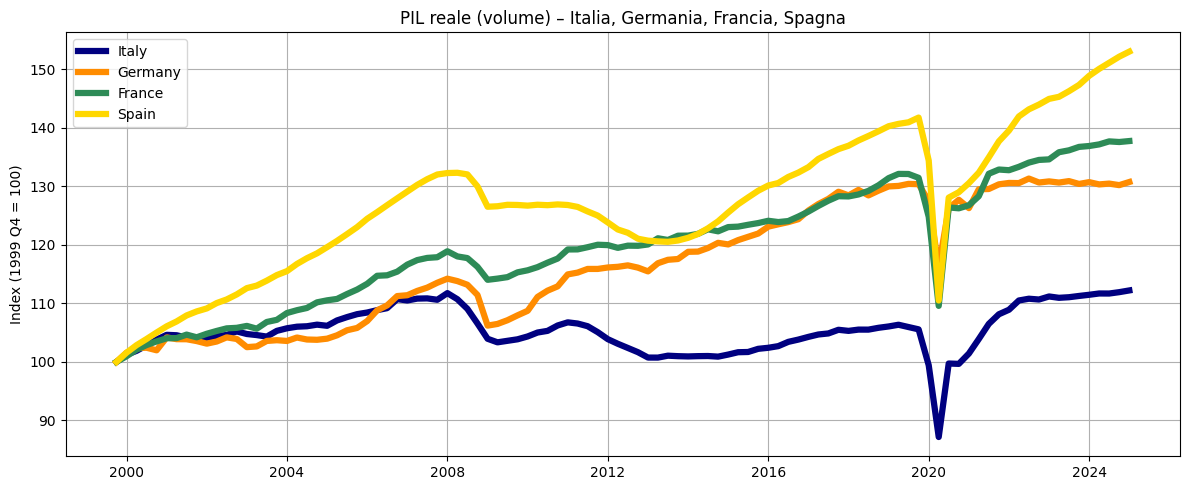

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json
df = fetch_eurostat_data("namq_10_gdp", {
    'na_item': 'B1GQ',
    'unit': 'CLV20_MEUR',
    's_adj': 'SCA',
    'geo': ['IT', 'ES', 'FR', 'DE'],
    'na_item': 'B1GQ'
})
# Filtra per trimestre
df['time'] = pd.to_datetime(df['time'], format='%Y-Q%q')
df = df[df['time'] >= '1999-10-01']  # 1999Q4
# Pivot: righe = tempo, colonne = paese
pivot_df = df.pivot(index='time', columns='geo_label', values='value').dropna()
# Normalizza base 100 a 1999Q4
base = pivot_df.iloc[0]
norm_df = pivot_df.divide(base).multiply(100)

labels = ['Italy', 'Germany', 'France', 'Spain']
colors = ['navy', 'darkorange', 'seagreen', 'gold']

plt.figure(figsize=(12, 5))
for label, color in zip(labels, colors):
    plt.plot(norm_df.index, norm_df[label], label=label, linewidth=4.5, color=color)

plt.ylabel("Index (1999 Q4 = 100)")
plt.title("PIL reale (volume) – Italia, Germania, Francia, Spagna")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---

## Grafico 2 - PIL reale indicizzato

- Dopo un avvio lento, la ripresa post-pandemica in Spagna è stata superiore a quella registrata in Italia (e nelle altre principali economie europee)

Il grafico mostra il PIL reale indicizzato al 4° trimestre 2019 = 100, con i dati trimestrali per:

- Italia (IT)
- Germania (DE)
- Francia (FR)
- Spagna (ES)

e copre il periodo dal 2019Q4 fino al 2025.

![](./media/Pasted%20image%2020250707122520.png)

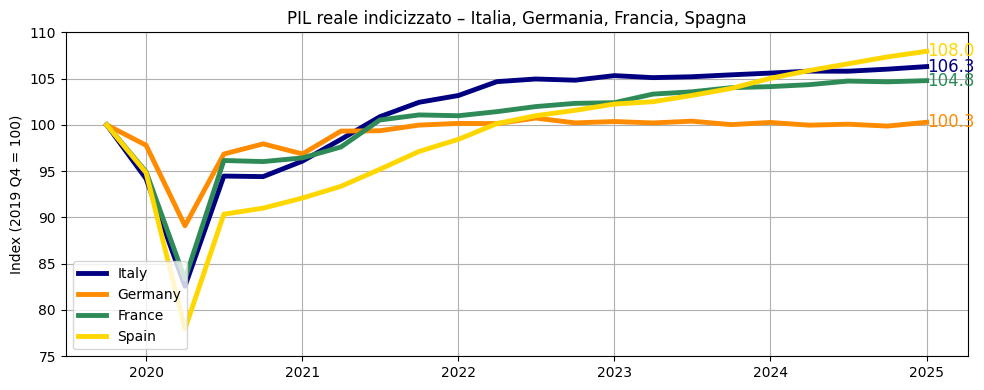

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Estrai dati trimestrali dal 2019 in poi
df = fetch_eurostat_data("namq_10_gdp", {
    'na_item': 'B1GQ',
    'unit': 'CLV20_MEUR',
    's_adj': 'SCA',
    'geo': ['IT', 'DE', 'FR', 'ES']
})

# Converti il campo tempo
df = df[df['time'] >= '2019-10-01']  # dal Q4 2019 in poi

# Crea tabella pivot: righe = tempo, colonne = paesi
pivot_df = df.pivot(index='time', columns='geo_code', values='value')

# Indicizza a 2019Q4 = 100
base = pivot_df.loc[pd.Timestamp('2019-10-01')]
norm_df = pivot_df.divide(base).multiply(100)

# Mappa etichette e colori
labels = {'IT': 'Italy', 'DE': 'Germany', 'FR': 'France', 'ES': 'Spain'}
colors = {'IT': 'navy', 'DE': 'darkorange', 'FR': 'seagreen', 'ES': 'gold'}

# Plot
plt.figure(figsize=(10, 4))
for code in ['IT', 'DE', 'FR', 'ES']:
    plt.plot(norm_df.index, norm_df[code], label=labels[code], linewidth=3.5, color=colors[code])

# Valori finali (ultimo punto)
for code in ['IT', 'DE', 'FR', 'ES']:
    val = norm_df[code].iloc[-1]
    plt.text(norm_df.index[-1], val, f"{val:.1f}", fontsize=12, color=colors[code], va='center', ha='left')

plt.ylim(75, 110)
plt.ylabel("Index (2019 Q4 = 100)")
plt.title("PIL reale indicizzato – Italia, Germania, Francia, Spagna")
plt.grid(True)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


## Figura 3 - PIL reale pro capite

- Gross domestic product (GDP) and main components per capita
- PIL pro-capite, 2019 4° trim. = 100. Fonte: Intesa Sanpaolo, Eurostat
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_pc?geo=IT&unit=CLV20_EUR_HAB&na_item=B1GQ
- dimensioni: "freq","unit","s_adj","na_item","geo","time"

![](./media/Pasted%20image%2020250707125258.png)


 Il dataset namq_10_pc è l'opzione ufficiale e diretta di Eurostat per il PIL pro capite, espresso in catene di volume (reale). Ti permette di replicare con precisione il grafico PIL reale pro capite, 2019Q4 = 100, senza calcoli manuali.

Contiene il PIL reale pro capite (quindi già diviso per abitanti) in diverse unità:

- CLV20_EUR_HAB → Chain-linked volumes (base 2020), euro per abitante (reale)
- CP_EUR_HAB → Corrente, euro per abitante (nominale)
- CLV_PCH_SM → Variazione % reale anno su anno per abitante

#### unit

- "CP_EUR_HAB": "Current prices, euro per capita",
- "CP_NAC_HAB": "Current prices, units of national currency per capita",
- "CLV_I20_HAB": "Chain linked volumes, Index 2020=100, per capita",
- "CLV_I15_HAB": "Chain linked volumes, Index 2015=100, per capita",
- "CLV_I10_HAB": "Chain linked volumes, Index 2010=100, per capita",
- "**CLV20_EUR_HAB**": "Chain linked volumes (2020), euro per capita",
- "CLV15_EUR_HAB": "Chain linked volumes (2015), euro per capita",
- "CLV10_EUR_HAB": "Chain linked volumes (2010), euro per capita",
- "CLV_PCH_SM_HAB": "Chain linked volumes, percentage change compared to same period in previous year, p- capita"


#### na_item

- "**B1GQ**": "Gross domestic product at market prices",
- "P3": "Final consumption expenditure",
- "P3_S13": "Final consumption expenditure of general government",
- "P31_S13": "Individual consumption expenditure of general government",
- "P32_S13": "Collective consumption expenditure of general government",
- "P31_S14_S15": "Household and NPISH final consumption expenditure",
- "P31_S14": "Final consumption expenditure of households",
- "P31_S15": "Final consumption expenditure of NPISH",
- "P41": "Actual individual consumption"

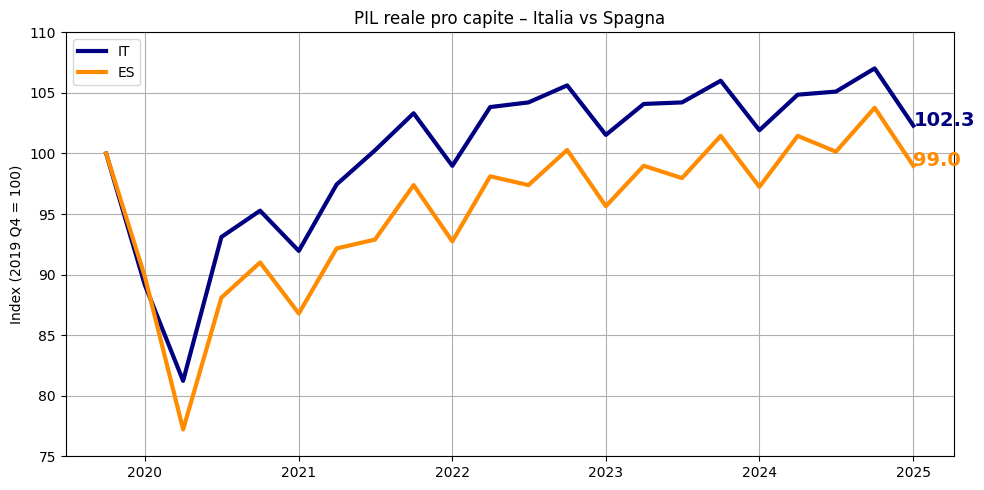

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Estrai PIL pro capite reale trimestrale, Italia e Spagna
# https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_pc?geo=IT&unit=CLV20_EUR_HAB&na_item=B1GQ
df = fetch_eurostat_data("namq_10_pc", {
    'na_item': 'B1GQ',
    'unit': 'CLV20_EUR_HAB',  # PIL reale pro capite (chain-linked volume)
    's_adj': 'NSA',
    'geo': ['IT', 'ES']
})

# Filtra dal Q4 2019 in poi
df = df[df['time'] >= '2019-10-01']

# Pivot: righe = tempo, colonne = paesi
pivot_df = df.pivot(index='time', columns='geo_code', values='value')

# Indicizza a base 100 = 2019Q4
base = pivot_df.loc[pd.Timestamp('2019-10-01')]
norm_df = pivot_df.divide(base).multiply(100)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(norm_df.index, norm_df['IT'], label='IT', color='navy', linewidth=3)
plt.plot(norm_df.index, norm_df['ES'], label='ES', color='darkorange', linewidth=3)

# Etichette finali
for code, color in [('IT', 'navy'), ('ES', 'darkorange')]:
    val = norm_df[code].iloc[-1]
    plt.text(norm_df.index[-1], val, f'{val:.1f}', color=color, fontsize=14, weight='bold')

plt.ylim(75, 110)
plt.ylabel("Index (2019 Q4 = 100)")
plt.title("PIL reale pro capite – Italia vs Spagna")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Figura 4 - Produttività reale per ora lavorata

- Labour productivity and unit labour costs
- produttività reale per ora lavorata, indicizzata 2010 = 100, non destagionalizzata, per Germania, Francia, Spagna, Italia
- namq_10_lp_ulc
- nazioni
- trimestri
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_lp_ulc?time=2023
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_lp_ulc?geo=IT
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_lp_ulc?geo=IT&unit=I10&s_adj=NULC_HW
- "id":["freq","unit","s_adj","na_item","geo","time"]
- "s_adj":{"label":"Seasonal adjustment","category":{"index":{"SCA":0},"label":{"SCA":"Seasonally and calendar adjusted data"}}},
- "na_item":{"label":"National accounts indicator (ESA 2010)","label":{"RLPR_PER":"Real labour productivity per person","RLPR_HW":"Real labour productivity per hour worked","NULC_PER":"Nominal unit labour cost based on persons","NULC_HW":"Nominal unit labour cost based on hours worked"}}}

![](media/Fig04.png)



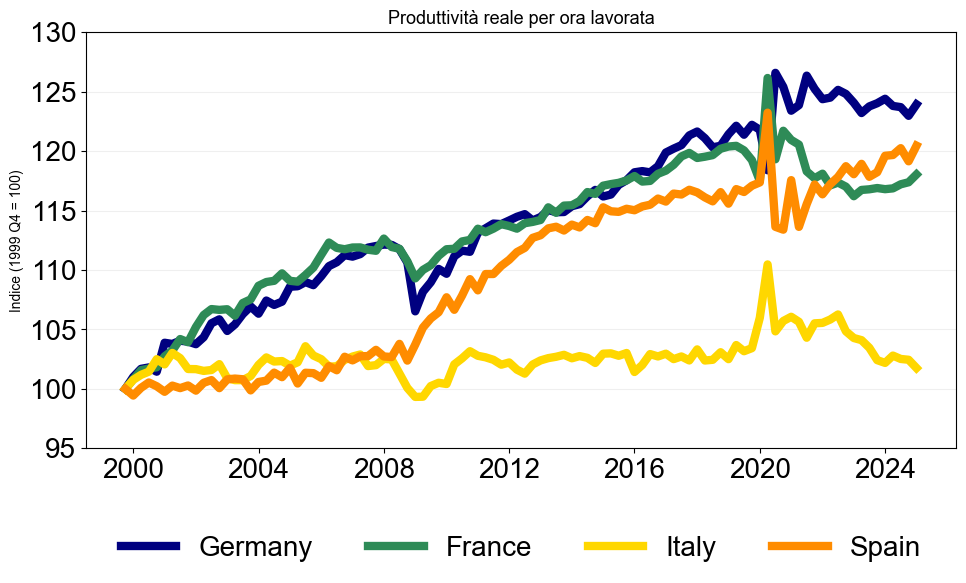

In [62]:
'''import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Estrai produttività reale per ora lavorata (indice 2010=100)
df = fetch_eurostat_data("namq_10_lp_ulc", {
    'na_item': 'RLPR_HW',
    'unit': 'I10',
    'geo': ['DE', 'FR', 'ES', 'IT'],
    's_adj': 'SCA'
})

# Parsing corretta della variabile temporale
df['time'] = pd.to_datetime(df['time_label'], errors='coerce')
df.loc[df['time'].isna() & df['time_label'].str.contains('Q'), 'time'] = pd.PeriodIndex(
    df.loc[df['time'].isna(), 'time_label'], freq='Q').to_timestamp()

# Filtra dal Q4 1999 in poi
df = df[df['time'] >= '1999-10-01']

# Pivot: tempo = index, paesi = colonne
pivot_df = df.pivot(index='time', columns='geo_code', values='value')

# Indicizza base 1999 Q4 = 100
base = pivot_df.loc[pd.Timestamp('1999-10-01')]
norm_df = pivot_df.divide(base).multiply(100)'''

# Etichette leggibili e colori simili a Intesa Sanpaolo
labels = {'DE': 'Germany', 'FR': 'France', 'IT': 'Italy', 'ES': 'Spain'}
colors = {'DE': 'navy', 'FR': 'seagreen', 'IT': 'gold', 'ES': 'darkorange'}

# Plot
plt.figure(figsize=(10, 6))
for code in ['DE', 'FR', 'IT', 'ES']:
    plt.plot(norm_df.index, norm_df[code], label=labels[code], linewidth=6, color=colors[code])

# Titolo e asse
plt.title("Produttività reale per ora lavorata", fontsize=13)
plt.ylabel("Indice (1999 Q4 = 100)")
plt.ylim(95, 130)
plt.grid(True, axis='y', alpha=0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(frameon=False)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False, fontsize=20)
plt.tight_layout()
plt.show()
